
# Introduction to AI in Chemistry


```{index} machine learning
```

Machine learning is a hot topic with popular applications in driverless cars, internet search engines, and data analysis among many others. Numerous fields are utilizing machine learning, and chemistry is certainly no exception, with papers using machine learning methods being published regularly. There is a considerable amount of hype around the topic along with debate about whether the field will live up to this hype. However, there is little doubt that machine learning is making a significant impact and is a powerful tool when used properly.

*Machine learning* occurs when a program exhibits behavior that is not explicitly programmed but rather is “learned” from data. This definition may seem somewhat unsatisfying because it is so broad that it is vague and only mildly informative. Perhaps a better way of explaining machine learning is through an example. In [section 13.1](13.1), we are faced with the challenge of writing a program that can accurately predict the boiling point of simple alcohols when provided with information about the alcohols, such as the molecular weight, number of carbon atoms, degree, etc. These pieces of information about each alcohol are known as *features*, while the answer we aim to predict (i.e., boiling point) is the *target*. How can each feature be used to predict the target? To generate a program for predicting boiling points, we would need to pour over the data to see how each feature affects the boiling point. Next, we would need to write a script that somehow uses these trends to calculate the boiling points of alcohols we have never seen. This probably appears like a daunting task. Instead, we can use machine learning to solve this task by allowing the machine learning algorithms to figure out how to use the data and make predictions. Simply provide the machine learning algorithm with the features and targets on a number of alcohols and allow the machine learning algorithm to quantify the trends and develop a function to predict the boiling point of alcohols. In simple situations, this entire task can be completed in just a few minutes!
The sections in this chapter are broken down by types of machine learning. There are three major branches of machine learning: supervised, unsupervised, and reinforcement learning. This chapter will focus on the first two, which are the most applicable to chemistry and data science, while the latter relates more to robotics and is not as commonly employed in chemistry.

There are multiple machine learning libraries for Python, but one of the most common, general-purpose machine learning libraries is scikit-learn. This library is simple to use, offers a wide array of common machine learning algorithms, and is installed by default with Anaconda. As you advance in machine learning, you may find it necessary to branch out to other libraries, but you will probably find that scikit-learn does almost everything you need it to do during your first year or two of using machine learning. In addition, scikit-learn includes functions for preprocessing data and evaluating the effectiveness of models.

```{index} scikit-learn
```

The scikit-learn library is abbreviated `sklearn` during imports. Each module needs to be imported individually, so you will see them imported throughout this chapter. We will be working with data and visualizing our results, so we will also be utilizing pandas, NumPy, and matplotlib. This chapter assumes the following imports.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 13.1 Supervised Learning

### 13.1.1 Features and Information

The file titled *ROH_data.csv* contains information on over seventy simple alcohols (i.e., a single -OH with no other non-hydrocarbon function groups) including their boiling points. Our goal is to generate a function or algorithm to predict the boiling points of the alcohols based on the information on the alcohols, so here the target is the boiling point and features are the other information about the alcohols.

In [2]:
ROH = pd.read_csv('ROH_data.csv', sep=',')
ROH.head()

FileNotFoundError: [Errno 2] No such file or directory: 'ROH_data.csv'

The dataset includes the boiling point (K), molecular weight (g/mol), number of carbon atoms, whether or not it is aliphatic, degree, whether it is cyclic, and the average position of any aryl substituents. Scikit-learn requires that all features be represented numerically, so for the last three features `1` represents `True` and `0` represents `False`.

Not every feature will be equally helpful in predicting the boiling points. Chemical intuition may lead someone to propose that the molecular weight will have a relatively large impact on the boiling points, and the scatter plot below supports this prediction with boiling points increasing with molecular weight. However, the molecular weight alone is not enough to obtain a good boiling point prediction as there is as much as a one-hundred-degree variation in boiling points at around the same molecular weight. The color of the markers indicates the degree of the alcohol, and it is pretty clear that tertiary alcohols tend to have lower boiling points than primary and secondary alcohols, which means there is a small amount of information in the degree that can be used to improve a boiling point prediction. If all the small amounts of information from each feature are combined, there is potential to produce a better boiling point prediction, and machine learning algorithms do exactly this.

(13.1.2)=
### 13.1.2 Train Test Split

Whenever training a machine learning model to make predictions, it is important to evaluate the accuracy of the predictions. It is unfair to test an algorithm on data it has already seen, so before training a model, first split the dataset into a training subset and a testing subset. It is also important to shuffle the dataset before splitting it as many datasets are at least partially ordered. The alcohol dataset is roughly in order of molecular weight, so if an algorithm is trained on the first three-quarters of the dataset and then tested on the last quarter, training occurs on smaller alcohols and testing on larger alcohols. This could result in poorer predictions as the machine learning algorithm is not familiar with the trends of larger alcohols. The good news is that scikit-learn provides a built-in function for shuffling and splitting the dataset known as `train_test_split()`. The arguments are the features, target, and the fraction of the dataset to be used for testing. Below, a quarter of the dataset is allotted for testing (`test_size=0.25`).

````{margin}
```{tip}
The `train_test_split()` function randomly shuffles the dataset before splitting it resulting in different results each time the function is called. The `random_state=` argument can be used to produce fixed results for example or demo purposes.
```
````

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
target = ROH['bp']
features = ROH[[ 'MW', 'carbons', 'degree', 'aliphatic',
                'avg_aryl_position','cyclic']]

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(features, target,
                                                   test_size=0.2, random_state=18)

The output includes four values containing the training/testing features and targets. By convention, `X` contains the features and `y` are the target values because they are the independent and dependent variables, respectively; and the features variable is capitalized because it contains multiple values per alcohol.

````{margin}
```{tip}
Another variable name convention is to capitalize variables that contain a collection and use lowercase letters for single values. For example, a single $x$-value in a plot would be `x` while a list containing multiple $x$-values would be `X`.
```
````

```{index} single: regression; machine learning
```
(13.1.3)=
### 13.1.3 Training a Linear Regression Model

Now for some machine learning using a very simple *linear regression* model. This model treats the target value as a linear combination or weighted sum of the features where $x$ are the features and $w$ are the weights.

$$ target = w_0x_0 + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 + ... $$

The general procedure for supervised machine learning, regardless of model, usually includes three steps.

1. Create a model and attach it to a variable.
2. Train the model with the training data.
3. Evaluate the model using the testing data or use it to make predictions.

To implement these steps, the linear model from the `linear_model` module is first created with the `LinearRegression()` function and assigned the variable `reg`. Next, it is trained using the `fit()` method and the training data from above.

In [ ]:
from sklearn import linear_model

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

Finally, the trained model can make predictions using the `predict()` method.

In [ ]:
prediction = model.predict(X_test)
prediction

array([522.13072483, 439.95804412, 421.71880302, 485.75361418,
       354.35249512, 444.98799633, 439.95804412, 487.73755723,
       488.75487164, 497.26835257, 388.03564907, 406.2242044 ,
       424.4634455 , 444.98799633, 485.70292841])

Remember that the algorithm has been only provided the features for the testing subset; it has never seen the `y_test` target data. The performance can be assessed by plotting the predictions against the true values.

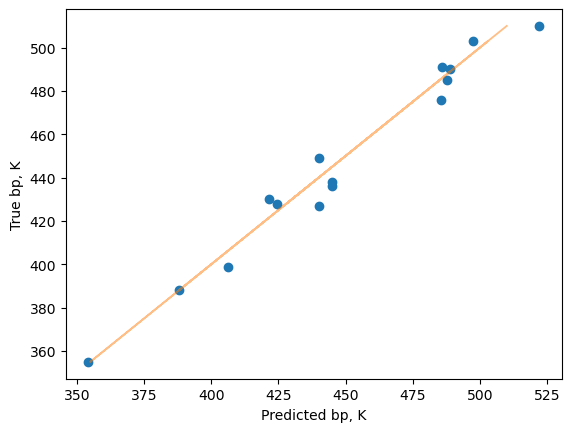

In [ ]:
plt.plot(prediction, y_test, 'o')
plt.plot(y_test, y_test, '-', lw=1.3, alpha=0.5)
plt.xlabel('Predicted bp, K')
plt.ylabel('True bp, K');

This is a substantial improvement from using only the molecular weight to make predictions! If the above code is run again, the results will likely vary because the `train_test_split()` function randomly splits the dataset, so each time the above code is run, the algorithm is trained and tested on different portions of the original dataset.

(13.1.4)=
### 13.1.4 Model Evaluation

It is important to evaluate the effectiveness of trained machine learning models before rolling them out for widespread use, and scikit-learn provides multiple built-in functions to help in this task. The first is the `score()` method. Instead of making predictions using the testing features and then plotting the predictions against the known values, the `score()` method takes in the testing features and target values and returns the $r^2$. The closer the $r^2$ value is to 1, the better the predictions are.

In [ ]:
model.score(X_test, y_test)

0.971279589849069

```{index} k-fold cross-validation
```

Another tool for evaluating the efficacy of a machine learning algorithm is *k-fold cross-validation*. The prediction results will vary depending on how the dataset is randomly split into training and testing data. *K*-fold cross-validation compensates for this randomness by splitting the entire dataset into *k* (*k* being some number) chunks called *folds*. It then reserves one fold as the testing fold and trains the algorithm on the rest. The algorithm is tested using the testing fold, and the process is repeated with a different fold reserved for testing (Figure 1). Each iteration trains a fresh algorithm, so it does not remember anything from the previous train/test iteration. The results for each iteration are provided at the end of this process.

![](img/cross_validation_folds.svg)

**Figure 1** In each iteration of *k*-fold cross-validation, different folds of data are used for training and testing the algorithm.

A demonstration of *k*-fold cross-validation is shown below. First, a cross-validation generator is created using the `ShuffleSplit()` function. This function shuffles the data to avoid having all similar alcohols in any particular fold. The linear model is then provided to the `cross_val_score()` function along with the feature and target data and the cross-validation generator.

In [ ]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

In [ ]:
splitter = ShuffleSplit(n_splits=5)

In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
scores = cross_val_score(reg, features, target, cv=splitter)
scores

array([0.98039779, 0.9615931 , 0.97844971, 0.87884968, 0.98478672])

The scores are the $r^2$ values for each iteration. The average $r^2$ is a pretty reasonable assessment of the efficacy of the model and can be found through the `mean()` function.

In [ ]:
scores.mean()

np.float64(0.9568153988629756)

(13.1.5)=
### 13.1.5 Linear Models and Coefficients

Recall that the linear model calculates the boiling point based on a weighted sum of the features, so it can be informative to know the weights to see which features are the most influential in making the predictions. The `LinearRegression()` method contains the attribute `coef_` which provides these coefficients in a NumPy array.

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg.coef_

array([ -5.0685772 ,  89.30069342, -15.49459863,   5.76949378,
        -2.03462882,  16.10620444])

These coefficients correspond to molecular weight, number of carbons, degree, whether or not it is aliphatic, average aryl position, and whether or not it is cyclic, respectively. While some coefficients are larger than others, we cannot yet distinguish which features are more important than the others because the values for each feature occur in different ranges. This is because the coefficients are not only proportional to the predictive value of a feature but also inversely proportional to the magnitude of feature values. For example, while the molecular mass has greater predictive value than the degree, the degree has a larger coefficient because it occurs in a smaller range (1 $\rightarrow$ 3) than the molecular weights (32.04 $\rightarrow$ 186.33 g/mol).

To address this issue, the scikit-learn `sklearn.preprocess` module provides a selection of functions for scaling the features to the same range. Three common feature scaling functions are described in Table 1, but others are detailed on the scikit-learn website.

**Table 1** Preprocessing Data Scaling Functions

| Scaler | Description |
| :----: | :---------  |
|`MinMaxScaler` | Scales the features to a designated range; defaults to \[0, 1\] |
|`StandardScaler` | Centers the features around zero and scales them to a variance of one |
| `RobustScaler` | Centers the features around zero using the median and sets the range using the quartiles; similar to StandardScaler except less affected by outliers|

For this data, we will use the `MinMaxScaler()` with the default scaling of values from 0 $\rightarrow$ 1. This process parallels the fit/predict procedure above except that instead of predicting the target, the algorithm transforms it. That is, first the algorithm learns about the data using the `fit()` method followed by scaling the data using the `transform()` method. Once the scaling model is trained, it can be used to scale any new data by the same amount as the original data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)

With the features now scaled, we can proceed through training the linear regression model as we have done previously and examine the coefficients.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
reg.coef_

array([-919.73730737, 1119.57555902,  -32.45290781,   13.42603464,
         -9.15061856,   16.51224254])

It is quite clear from the coefficients that the molecular weight and number of carbons are both by far the most important features to predicting the boiling points of alcohols. This makes chemical sense, being that larger molecules have greater London dispersion forces, thus increasing the boiling points.